In [ ]:
import kaggle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.lines import Line2D

In [2]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files("radheshyamkollipara/bank-customer-churn", path='./data', unzip=True)
df = pd.read_csv("data/Customer-Churn-Records.csv")
df = df.drop(columns=["RowNumber","CustomerId","Surname"])
df.info()

Dataset URL: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned      

In [3]:
print(f'{df.duplicated().sum()} linhas duplicadas')
df.describe().transpose()

0 linhas duplicadas


,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203800,0.402842,0.00,0.00,0.000,0.0000,1.00
Complain,10000.0,0.204400,0.403283,0.00,0.00,0.000,0.0000,1.00


CreditScore: 15 outliers
NumOfProducts: 60 outliers
Age: 359 outliers
Balance: 0 outliers
EstimatedSalary: 0 outliers
Point Earned: 0 outliers
Tenure: 0 outliers


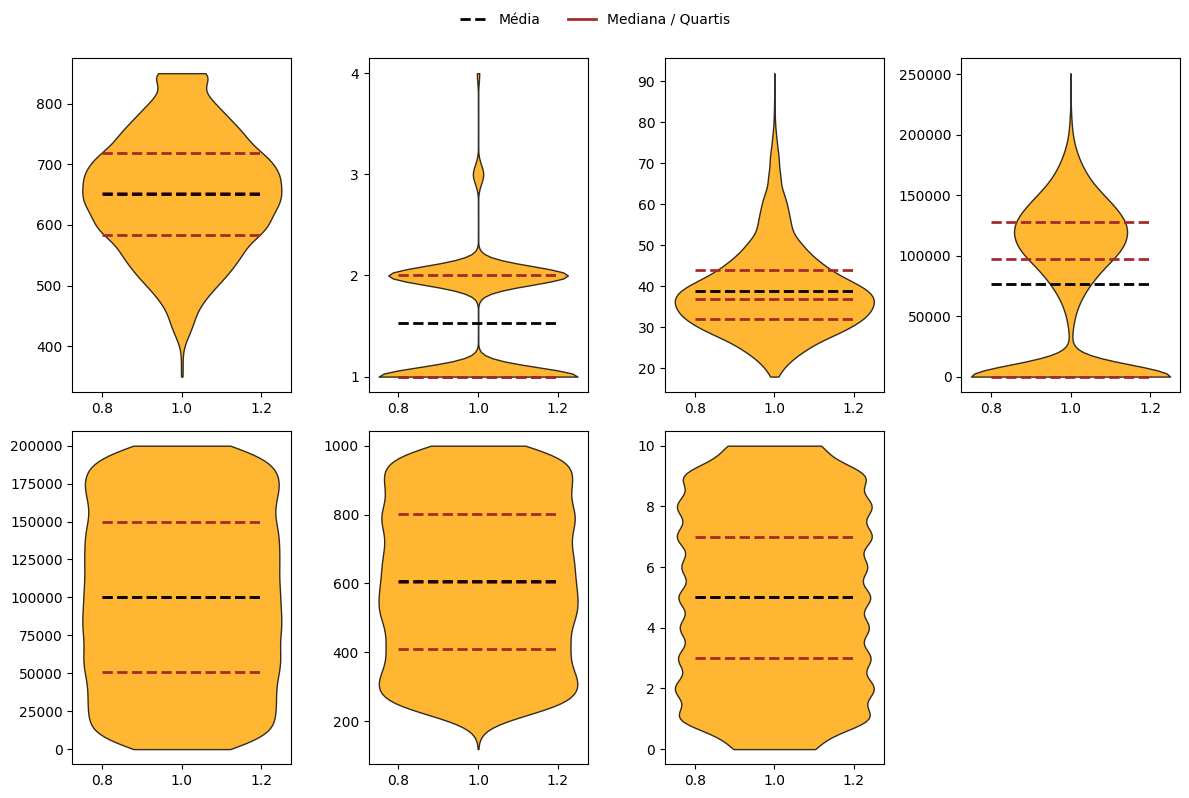

In [4]:
varbox = ['CreditScore','NumOfProducts', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned','Tenure']

for col in varbox:
    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    iqr = q3-q1

    upper = q3 + iqr*1.5
    lower = q1 - iqr*1.5
    
    outliers = df[(df[col] < lower) | (df[col] > upper)].copy()
    outliers['OutlierColumn'] = col
    print(f"{col}: {outliers.shape[0]} outliers")

fig, axes = plt.subplots(2, 4, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(varbox):
    ax = axes[i]

    violinos = ax.violinplot(df[col],showextrema=False)

    for violino in violinos['bodies']:
        violino.set_facecolor('orange')
        violino.set_edgecolor('black')
        violino.set_alpha(0.8)

    q1, med, q3 = df[col].quantile(0.25), df[col].quantile(0.50), df[col].quantile(0.75)

    ax.hlines([q1, med, q3], xmin=0.8, xmax=1.2, linestyle='--', colors='brown', linewidth=2)
    ax.hlines(df[col].mean(), xmin=0.8, xmax=1.2, linestyle='--', colors='black', linewidth=2)

    if col == 'NumOfProducts':
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))

for ax in axes[len(varbox):]:
    ax.set_visible(False)

legend_elements = [
    Line2D([0], [0], color='black', linestyle='--', linewidth=2, label='Média'),
    Line2D([0], [0], color='brown', linewidth=2, label='Mediana / Quartis')
]

fig.legend(handles=legend_elements, loc='upper center', ncol=3, frameon=False)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

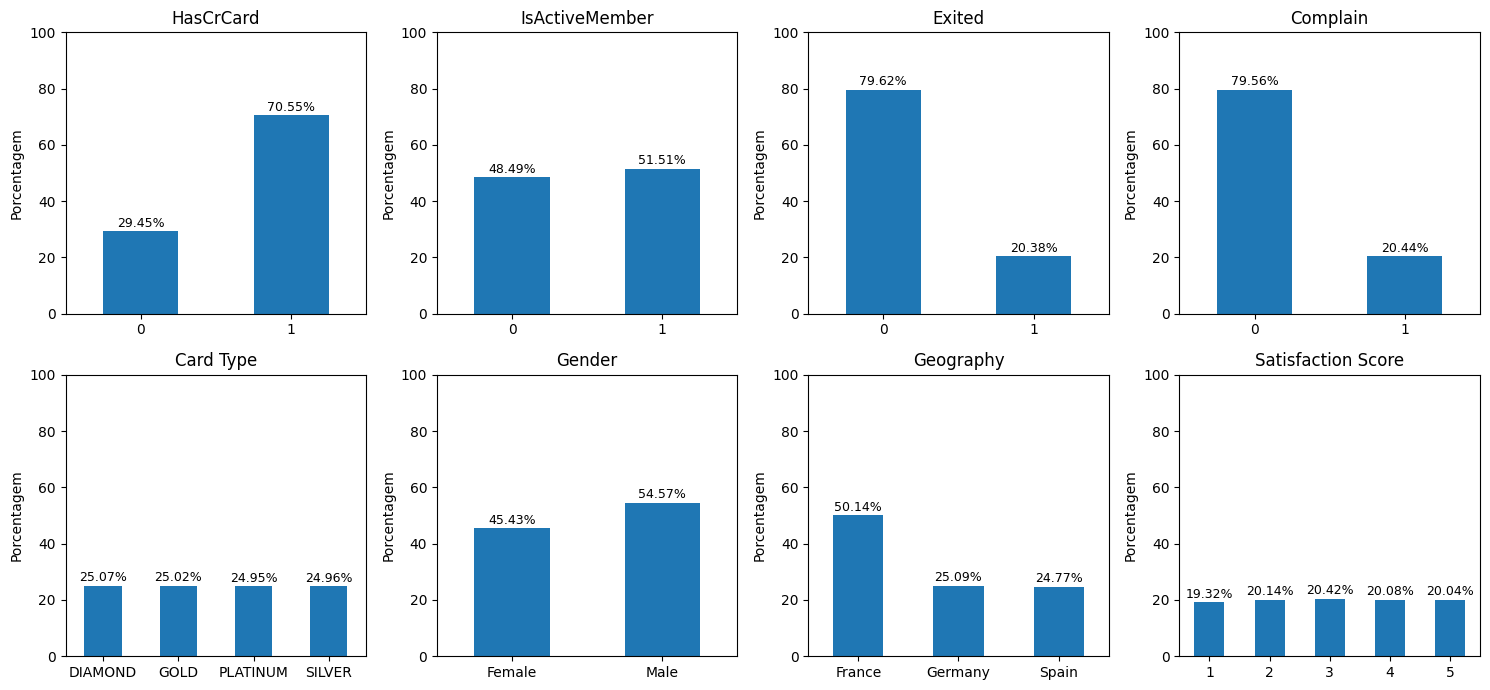

In [5]:
varbar = ['HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Card Type','Gender',"Geography",'Satisfaction Score']

fig,axes = plt.subplots(2,4, figsize = (15,7))
axes = axes.flatten()

for i, col in enumerate(varbar):
    ax=axes[i]

    df[col].value_counts(normalize=True).sort_index().mul(100).plot(kind='bar',ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.tick_params(axis='x',rotation=0)
    ax.set_ylim(0, 100)
    ax.set_ylabel('Porcentagem')
    
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 1), textcoords='offset points', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

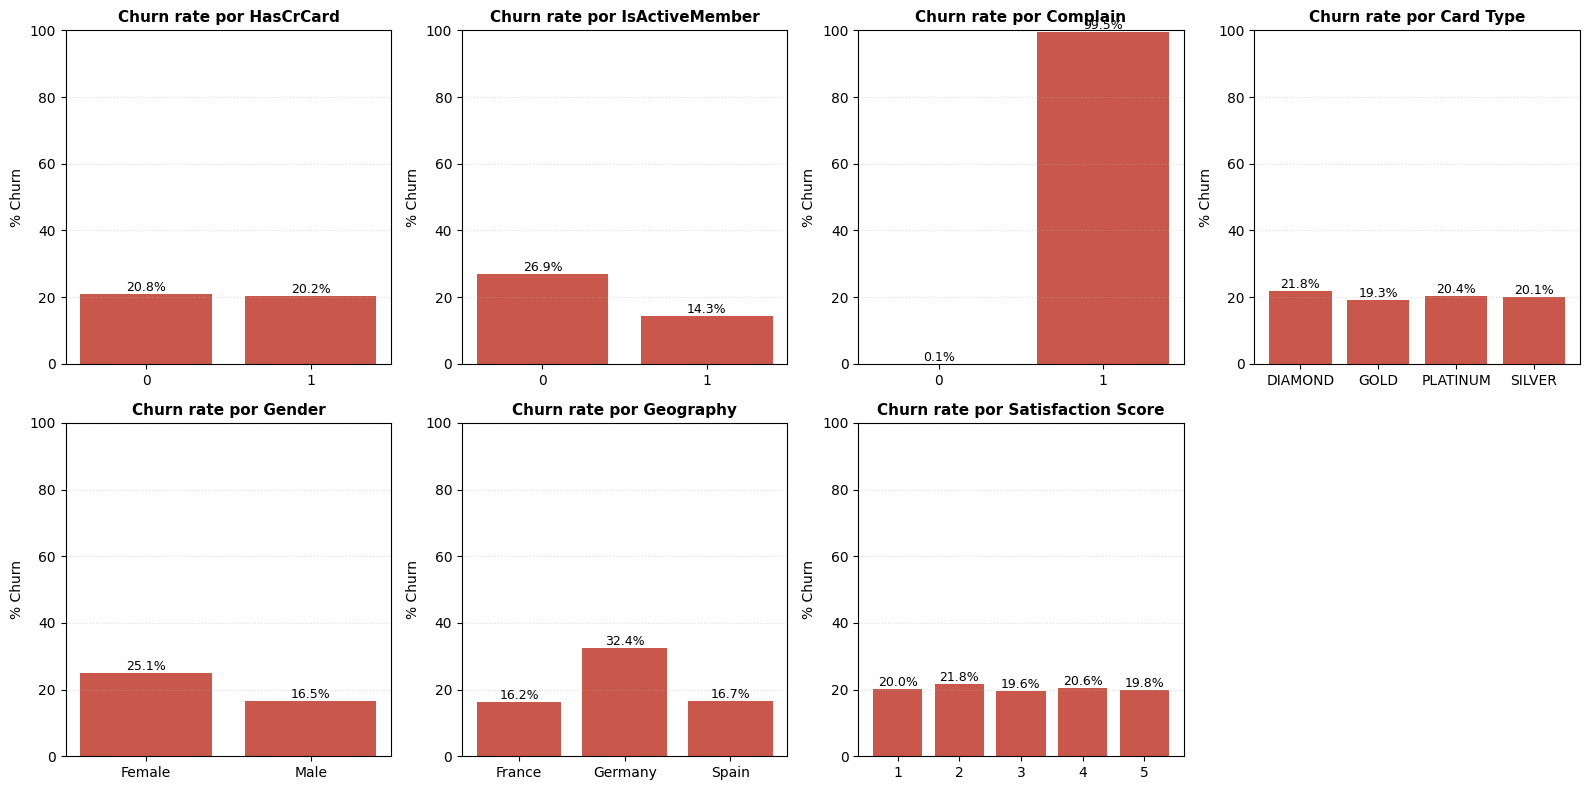

In [6]:
import matplotlib.pyplot as plt
import numpy as np

varbar = [
    'HasCrCard', 'IsActiveMember', 'Complain',
    'Card Type', 'Gender', 'Geography', 'Satisfaction Score'
]

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(varbar):
    ax = axes[i]

    # Taxa de churn por categoria (%)
    churn_rate = (
        df.groupby(col)['Exited']
          .mean()
          .mul(100)
          .sort_index()
    )

    bars = ax.bar(
        churn_rate.index.astype(str),
        churn_rate.values,
        color='#C0392B',
        alpha=0.85
    )

    # Anotar percentual
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.1f}%',
            ha='center',
            va='bottom',
            fontsize=9
        )

    ax.set_title(f'Churn rate por {col}', fontsize=11, fontweight='bold')
    ax.set_ylabel('% Churn')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=0)

    ax.set_ylim(0, 100)
    ax.grid(axis='y', linestyle=':', alpha=0.4)

# Ocultar eixos vazios
for ax in axes[len(varbar):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()
